# E10 Classification and clustering 

The aim of this exersise is to search for clusters/groups in a given dataset using the **k-means algorithm**. Remember that we use clustering when we don't know the groups exisiting in the data and we want to explore the possible group structure. 

Since we don't know how many groups exist in the dataset, we will run the k-means algorithm multiple times to search for different numbers of clusters. In turn, we will use the **silhouett analysis** to determine how many clusters are likely to be valid. 

In [2]:
# construction of the cluster data 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(102025)
x1 = np.random.normal(-0.6,0.08,30)
x2 = np.array([-0.012,-0.01,0.01,0.05,0.1,0.2,0.22,0.3,0.2,0.39])
x3 = np.random.normal(-0.1,0.04,30)
x4 = np.random.normal(0.4,0.08,30)

xData = np.concatenate((x1,x2,x3,x4))

y1 = np.random.normal(0,0.08,30)
y2 = np.array([-0.81,-0.85,-1.03,-0.7,-1.12,-1.13,-1.11,-1.18,-0.8,-1.17])
y3 = np.random.normal(0.,0.04,30)
y4 = np.random.normal(0.5,0.08,30)
y3 = y3 -0.3*x3
y4 = y4 - 0.7*x4

yData = np.concatenate((y1,y2,y3,y4))

Xdata = np.column_stack((xData,yData))

np.save('data-set-clustering.npy',Xdata)

plt.scatter(xData,yData)

del(xData,yData,Xdata)

#### 1. Implementation of the k-means clustering algorithm

We will use k-means to separate the dataset into *k* pre-defined distinct, non-overlapping clusters. 

**Your first task** is to implement the k-means clustering. For this purpose, load the 2-dimensional dataset and perform the clustering using the code below. You have to specifiy how many clusters you want to be found, i.e., you have to asign a number to `nClusters`. Let's start with looking for three clusters, i.e., `nClusters=3`. 

**Note:** You first need to load the dataset (using `np.load()`) from the provided numpy binary file `data-set-clustering.npy` and save it as `Xdata`. The dataset has 100 entries, each containing two input variables (as for the example in class). 

In [2]:
# k-means clustering algorithm implementation
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Xdata = np.load('data-set-clustering.npy')

nClusters = 3

kmeans = KMeans(n_clusters=nClusters)
Ypred = kmeans.fit_predict(Xdata)

#### 2. Assessing clustering with Silhouette analysis

Use the Silhouette score to assess how well the clusters are separted. Remember from class, the silhouette analysis gives a perspective into the density and separation of the formed clusters. The clustering with the highest silhouette score reflects to most likely separation of the data. 

**Your second task** is to run k-means clustering testing 2 to 7 clusters (varying the `nClusters` variable). Calculate and save the silhouette score for each of the obtained clusterings. 

**Note :** The Silhouette score can be computed with the line below *after* running the k-means clustering (code above).

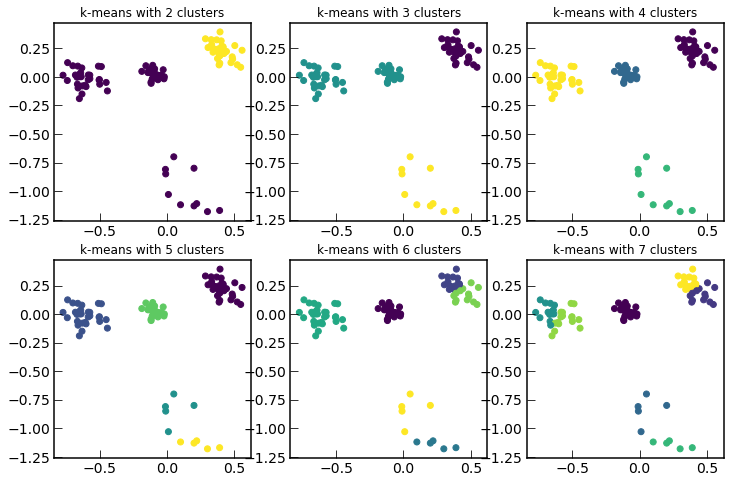

In [1]:
# k-means clustering algorithm implementation
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Xdata = np.load('data-set-clustering.npy')

#nC = [number of clusters to be found by k-means]
nClusters = [2,3,4,5,6,7]
silScore = []

fig = plt.figure(figsize=(12,8))
i=1
for n in nClusters:
    kmeans = KMeans(n_clusters=n)
    Ypred = kmeans.fit_predict(Xdata)
    silhouette_avg = silhouette_score(Xdata, Ypred)
    silScore.append(silhouette_avg)
    ax = fig.add_subplot('23%s'%i)
    ax.set_title('k-means with %s clusters'%n)
    ax.scatter(Xdata[:, 0], Xdata[:, 1], c=Ypred)
    i+=1



#### 3. Visualize the Silhouette score

Plot the Silhouette score as a function of the number of pre-determined clusters in the k-means algorithm (`nClusters`). Determine based on the Silhouette score which of the clusterings is the most valid, i.e., the most likely clustering structure in the data. 

Text(0, 0.5, 'Silhouette score')

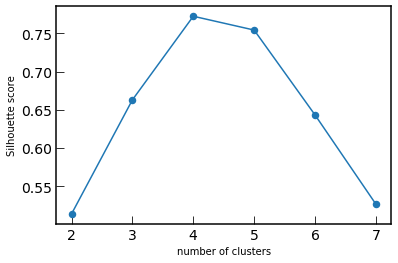

In [4]:
plt.plot(nClusters,silScore,'o-')
plt.xlabel('number of clusters')
plt.ylabel('Silhouette score')

The k-means algorithm with 4 clusters yields the highest Silhouette score. In turn, **four clusters provide the most likely clustering of the data-set**.  

## The end